In [1]:
import pandas as pd
df = pd.read_csv('heart_diagnose.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

In [2]:
df.describe()

,age,sex,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,1.000000


In [3]:
df.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


In [4]:
print(df['pain type'].unique())
print(df['thal'].unique())

['four' 'three' 'two' 'one']
['normal' 'reversable defect' 'fixed defect']


In [5]:
for column in ['pain type','thal']:
    one_hot = pd.get_dummies(df[column],prefix=column)
    df = df.drop(column,axis = 1)
    df = pd.concat([df,one_hot],axis = 1)
df.head()

,age,sex,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease,pain type_four,pain type_one,pain type_three,pain type_two,thal_fixed defect,thal_normal,thal_reversable defect
0,70,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,1,1,0,0,0,0,1,0
1,67,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,0,0,0,1,0,0,0,1
2,57,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1,0,0,0,1,0,0,1
3,64,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0,1,0,0,0,0,0,1
4,74,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0,0,0,0,1,0,1,0


In [6]:
from sklearn.decomposition import PCA
pca = PCA(2)
target = df['heart disease']
df = df.drop('heart disease',axis=1)
data_pca = pca.fit_transform(df)
pca_df = pd.DataFrame(data_pca,columns=['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,73.175051,40.721090
1,312.592829,-17.288163
2,11.012027,8.014054
3,14.022737,44.854252
4,19.676251,30.118299


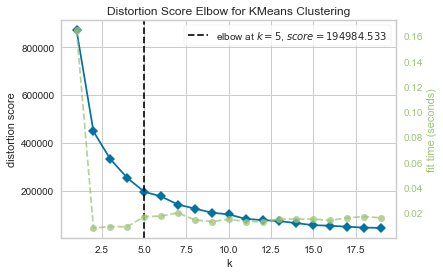

best k value based on elbow: 5


In [7]:
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(pca_df) 
visualizer.show()  
best_k_elbow = visualizer.elbow_value_
print("best k value based on elbow:",best_k_elbow)

best k based on silhouette_score : 2


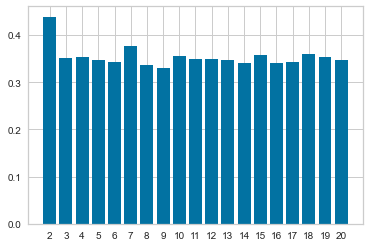

In [8]:
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import pyplot as plt
x_ax = []
y_ax = []
for i in range(2,21):
    model = KMeans(n_clusters=i, n_init='auto')
    labels = model.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    x_ax.append(i)
    y_ax.append(score)
bars = plt.bar(x=x_ax,height=y_ax,tick_label=range(2,21))
best_k_silhouette = y_ax.index(max(y_ax))+2
print("best k based on silhouette_score :",best_k_silhouette)

scatter plot of best k found by elbow method


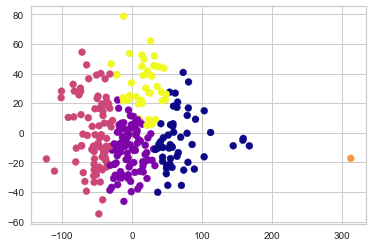

In [9]:
km_elbow = KMeans(n_clusters=best_k_elbow,n_init='auto')
clusters_elbow = km_elbow.fit_predict(pca_df)
print("scatter plot of best k found by elbow method")
sct_plt = plt.scatter(x=pca_df.to_numpy()[:,0],y=pca_df.to_numpy()[:,1],c=clusters_elbow,cmap='plasma')


scatter plot of best k found by silhouette method


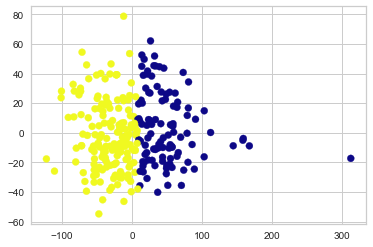

In [10]:
km_silhouette = KMeans(n_clusters=best_k_silhouette,n_init='auto')
clusters_silhouette = km_silhouette.fit_predict(pca_df)
print("scatter plot of best k found by silhouette method")
sct_plt = plt.scatter(x=pca_df.to_numpy()[:,0],y=pca_df.to_numpy()[:,1],c=clusters_silhouette,cmap='plasma')

In [11]:
#6
print("describe the clusters found by elbow")
clusters = km_elbow.labels_
for i in range(best_k_elbow):
    print(pca_df.loc[clusters == i].describe())

describe the clusters found by elbow
             PCA1       PCA2
count   54.000000  54.000000
mean    68.556443  -5.260096
std     31.088856  17.488217
min     33.474138 -40.197268
25%     50.018007 -16.412027
50%     58.551889  -8.403512
75%     78.964977   5.158488
max    167.731577  40.721090
            PCA1       PCA2
count  94.000000  94.000000
mean   -3.807410 -11.533439
std    15.784539  14.692352
min   -31.562965 -46.355839
25%   -16.636112 -21.878261
50%    -5.156708 -10.831683
75%     7.135251  -0.371342
max    32.821452  22.139081
             PCA1       PCA2
count   79.000000  79.000000
mean   -54.763375   0.252542
std     19.654710  23.529989
min   -122.176235 -54.790160
25%    -66.083487 -17.637824
50%    -48.528754  -1.801040
75%    -40.746112  19.041109
max    -27.683102  54.396422
             PCA1       PCA2
count    1.000000   1.000000
mean   312.592829 -17.288163
std           NaN        NaN
min    312.592829 -17.288163
25%    312.592829 -17.288163
50%    312.5928

In [12]:
#6
print("describe the clusters found by silhouette")
clusters = km_silhouette.labels_
for i in range(best_k_silhouette):
    print(pca_df.loc[clusters == i].describe())

describe the clusters found by silhouette
             PCA1        PCA2
count  106.000000  106.000000
mean    49.187572    3.188727
std     41.418149   23.748245
min      8.226424  -40.197268
25%     22.453783  -15.598556
50%     41.596311   -2.286372
75%     59.179173   20.513960
max    312.592829   62.020543
             PCA1        PCA2
count  164.000000  164.000000
mean   -31.791967   -2.061006
std     27.185343   23.218553
min   -122.176235  -54.790160
25%    -48.119448  -18.451757
50%    -28.450447   -6.359735
75%    -11.043030   11.746778
max      8.361638   78.665484
